### Feature visualization (Tensorflow)

This is an example of feature visualization with a Tensorflow model. The feature visualization in OmniXAI is an optimization-based method, allowing to set different objectives, e.g., layer, channel, neuron or direction. For more information, please visit https://distill.pub/2017/feature-visualization/

In [1]:
# This default renderer is used for sphinx docs only. Please delete this cell in IPython.
import plotly.io as pio
pio.renderers.default = "png"

In [2]:
from tensorflow.keras.applications import vgg16
from omnixai.explainers.vision.specific.feature_visualization.visualizer import FeatureVisualizer

Here we choose the VGG16 model for demonstration (you may test other CNN models, e.g., ResNet). The target layer is the layer to analyze.

In [3]:
model = vgg16.VGG16()
target_layer = model.layers[15]

The first example is the "layer" objective, where we optimize the input image such that the average output of the layer is maximized.

Step: 300 |████████████████████████████████████████| 100.0% 


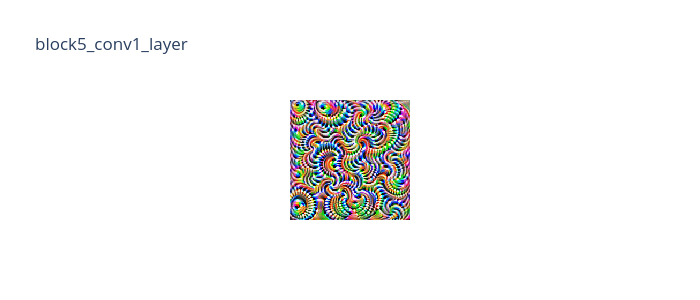

In [4]:
optimizer = FeatureVisualizer(
    model=model,
    objectives=[{"layer": target_layer, "type": "layer"}]
)
explanations = optimizer.explain(
    num_iterations=300,
    image_shape=(224, 224)
)
explanations.ipython_plot()

The second example is the "channel" objective, where the input image is optimized such that the output of the specified channel is maximized.

Step: 300 |████████████████████████████████████████| 100.0% 


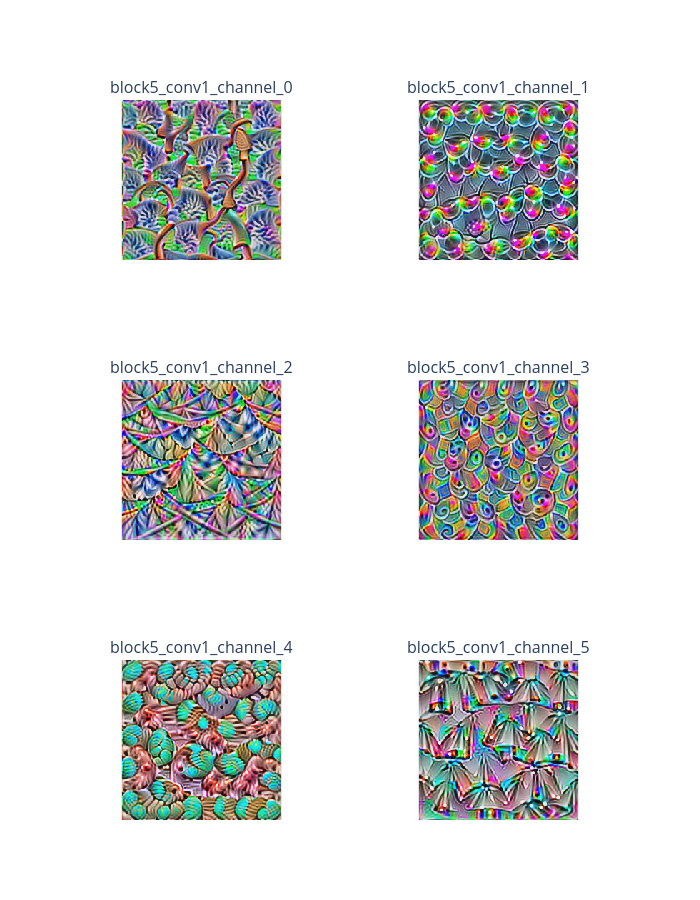

In [5]:
optimizer = FeatureVisualizer(
    model=model,
    objectives=[{"layer": target_layer, "type": "channel", "index": list(range(6))}]
)
explanations = optimizer.explain(
    num_iterations=300,
    image_shape=(224, 224)
)
explanations.ipython_plot()

We can also consider a combination of multiple objectives. The default weight for each objective is 1.0. We can set other weights as well.

Step: 300 |████████████████████████████████████████| 100.0% 


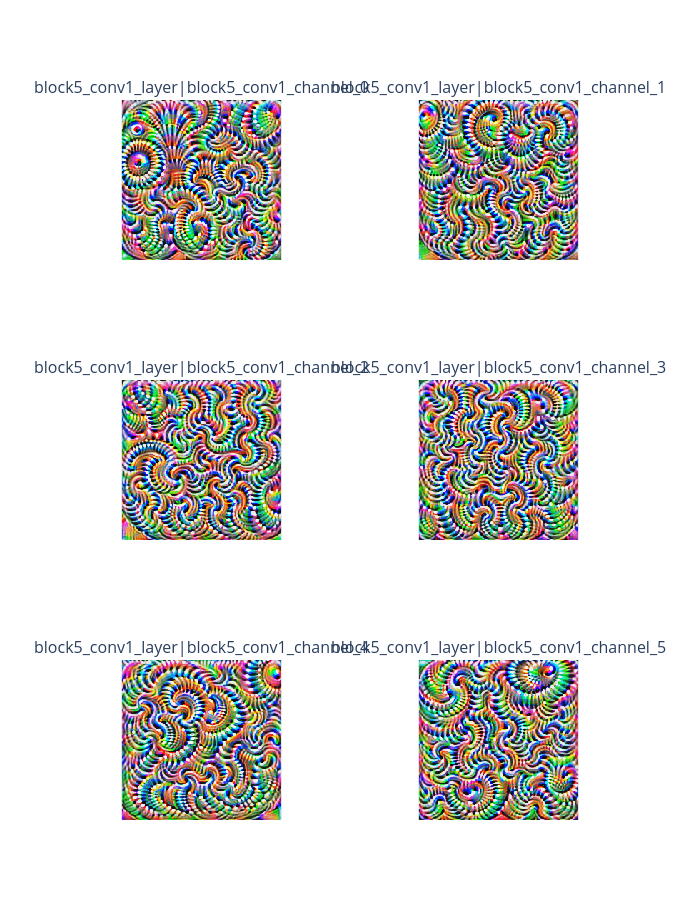

In [6]:
optimizer = FeatureVisualizer(
    model=model,
    objectives=[
        {"layer": target_layer, "type": "layer", "weight": 0.1},
        {"layer": target_layer, "type": "channel", "index": list(range(6))}
    ]
)
explanations = optimizer.explain(
    num_iterations=300,
    image_shape=(224, 224)
)
explanations.ipython_plot()